In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  mean_squared_error
from scipy.stats import zscore
from xgboost import XGBRegressor
import xgboost as xgb
# from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score,mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold,StratifiedKFold
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
# Import the library
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/vehicle_claims_labeled.csv')

In [14]:
data.describe()

,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,issue_id,Adv_day,repair_complexity,repair_cost,repair_hours,Label,category_anomaly
count,268255.000000,268255.000000,268255.000000,2.682550e+05,2.682550e+05,268255.000000,268255.000000,268255.000000,268255.000000,268255.000000,268255.000000,268255.000000,268255.000000,268255.000000
mean,2018.127778,5.626143,2012.734454,4.789530e+04,1.336874e+04,5.147665,4.297396,0.499048,14.528717,1.361496,444.610199,62.070247,0.211549,0.093076
std,0.747476,2.091577,6.774572,4.193141e+04,4.131664e+04,1.840407,1.149057,1.133988,8.070252,0.725593,1806.642861,803.694550,0.408407,0.290539
min,2012.000000,1.000000,1900.000000,-1.996600e+04,-6.999250e+05,1.000000,0.000000,0.000000,1.000000,1.000000,-2998.000000,-30.000000,0.000000,0.000000
25%,2018.000000,4.000000,2010.000000,1.399950e+04,4.985000e+03,5.000000,4.000000,0.000000,8.000000,1.000000,40.691000,1.000000,0.000000,0.000000
50%,2018.000000,5.000000,2014.000000,3.900000e+04,9.289000e+03,5.000000,5.000000,0.000000,15.000000,1.000000,121.500000,2.000000,0.000000,0.000000
75%,2018.000000,7.000000,2016.000000,7.500000e+04,1.700000e+04,5.000000,5.000000,0.000000,22.000000,1.000000,334.500000,6.000000,0.000000,0.000000
max,2021.000000,33.000000,3010.000000,6.363342e+06,9.999999e+06,20.000000,7.000000,5.000000,28.000000,4.000000,259480.000000,180985.493395,1.000000,1.000000


In [15]:
data.head()

,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,Label,category_anomaly,repair_date
0,Bentley,Arnage,10_1,2018,4,Silver,2000.0,Saloon,60000,6.8L,...,Starter Motor Issue,0,19,2018-04-19,3,395.000,9.0,0,0,2018-04-21
1,Bentley,Arnage,10_1,2018,6,Grey,2002.0,Saloon,44000,6.8L,...,Radiator Leaking,0,15,2018-06-15,3,695.000,6.0,0,0,2018-06-16
2,Bentley,Arnage,10_1,2017,11,Blue,2002.0,Saloon,55000,6.8L,...,Steering Wheel Shaking,0,10,2017-11-10,3,89.999,3.0,0,0,2017-11-10
3,Bentley,Arnage,10_1,2018,4,Green,2003.0,Saloon,14000,6.8L,...,Electrical Issue,4,14,2018-04-14,3,224.844,6.0,0,0,2018-04-15
4,Bentley,Arnage,10_1,2017,11,Grey,2003.0,Saloon,61652,6.8L,...,Windscreen Crack,0,6,2017-11-06,3,75.933,3.0,0,0,2017-11-06


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Maker              268255 non-null  object 
 1    Genmodel          268255 non-null  object 
 2    Genmodel_ID       268255 non-null  object 
 3   Adv_year           268255 non-null  int64  
 4   Adv_month          268255 non-null  int64  
 5   Color              268255 non-null  object 
 6   Reg_year           268255 non-null  float64
 7   Bodytype           268255 non-null  object 
 8   Runned_Miles       268255 non-null  int64  
 9   Engin_size         268255 non-null  object 
 10  Gearbox            268255 non-null  object 
 11  Fuel_type          268255 non-null  object 
 12  Price              268255 non-null  float64
 13  Seat_num           268255 non-null  float64
 14  Door_num           268255 non-null  float64
 15  issue              268255 non-null  object 
 16  is

In [17]:
data.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month', 'Color',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue', 'issue_id',
       'Adv_day', 'breakdown_date', 'repair_complexity', 'repair_cost',
       'repair_hours', 'Label', 'category_anomaly', 'repair_date'],
      dtype='object')

In [18]:
data['Bodytype'].value_counts()

Bodytype
Hatchback          103768
SUV                 64396
Saloon              22583
MPV                 22507
Coupe               17082
Estate              16797
Convertible         13206
Pickup               5268
Wood                  954
Combi Van             657
Panel Van             477
Minibus               229
Car Derived Van       119
Limousine              93
Window Van             88
Camper                 24
Manual                  5
Tipper                  1
Chassis Cab             1
Name: count, dtype: int64

In [19]:
data['Maker'].value_counts()

Maker
Ford          26937
Audi          22521
Vauxhall      20158
Volkswagen    17999
BMW           17194
              ...  
Brooke            1
MEV               1
Grinnall          1
Koenigsegg        1
Pilgrim           1
Name: count, Length: 88, dtype: int64

In [20]:
data['Gearbox'].value_counts()

Gearbox
Manual            170832
Automatic          97119
Hybrid               167
Semi-Automatic       137
Name: count, dtype: int64

In [21]:
data.isnull().sum()

Maker                0
 Genmodel            0
 Genmodel_ID         0
Adv_year             0
Adv_month            0
Color                0
Reg_year             0
Bodytype             0
Runned_Miles         0
Engin_size           0
Gearbox              0
Fuel_type            0
Price                0
Seat_num             0
Door_num             0
issue                0
issue_id             0
Adv_day              0
breakdown_date       0
repair_complexity    0
repair_cost          0
repair_hours         0
Label                0
category_anomaly     0
repair_date          0
dtype: int64

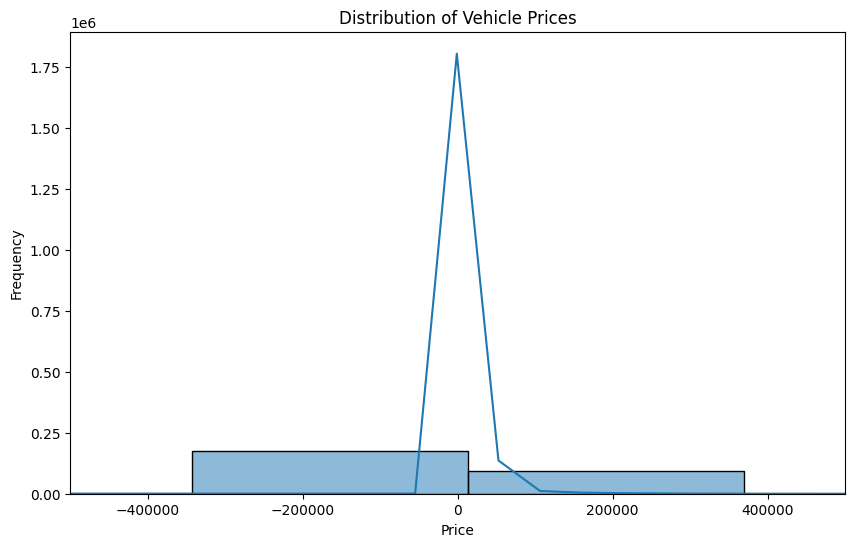

In [22]:
# Display distribution of the price variable
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(-500000, 500000)
plt.show()

In [23]:
# Filter rows with price equal to 0
zero_price_vehicles = data[data['Price'] == 0]

# Display the filtered rows
print(len(zero_price_vehicles))

0


In [24]:
# Feature Engineering
# Calculate the age of the vehicle when it was last repaired
data['breakdown_date'] = pd.to_datetime(data['breakdown_date'])
data['repair_date'] = pd.to_datetime(data['repair_date'])
data['last_repair_age'] = (data['breakdown_date'] - data['repair_date']).dt.days / 365.25

In [25]:
from datetime import datetime
def extract_datetime_features(df, datetime_cols):
    datetime_features = []
    for col in datetime_cols:
        df[col] = pd.to_datetime(df[col])
        # Extract date features
        df[f"{col}_dayofweek"] = df[col].dt.dayofweek
        df[f"{col}_month"] = df[col].dt.month
        datetime_features.extend([f"{col}_month",
                                  f"{col}_dayofweek"])
    return df[datetime_features]

In [26]:
datetime_cols=['breakdown_date','repair_date']
datetime_features = extract_datetime_features(data, datetime_cols)

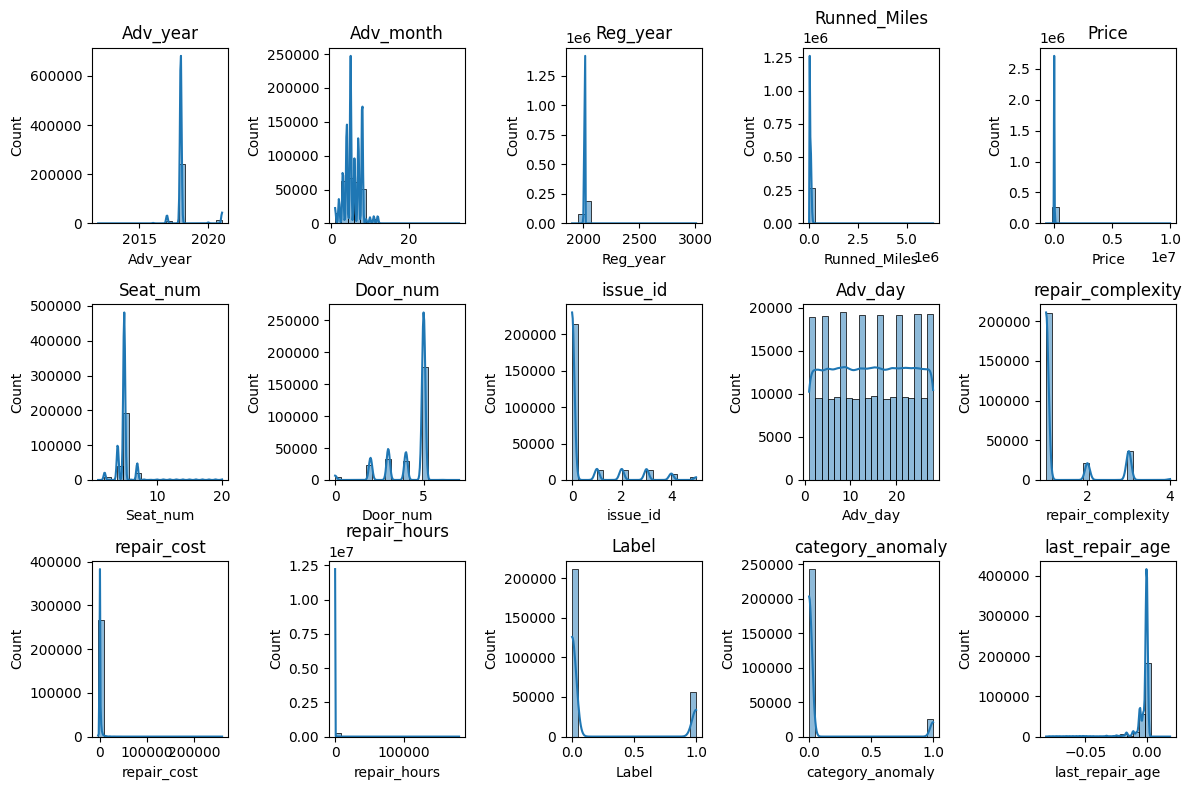

In [27]:
# Distribution of Numerical Features
numerical_columns = [col for col in data.columns if data[col].dtype in ['float64', 'int64']]

plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 5, numerical_columns.index(feature) + 1)
    sns.histplot(data=data[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()


Dealing with Skewness in the dataset

In [28]:
# Apply log transformation to Reg_year
data['Reg_year_log'] = np.log1p(data['Reg_year'])

# Apply log transformation to Runned_Miles
data['Runned_Miles_log'] = np.log1p(data['Runned_Miles'])

# Apply log transformation to repair_cost
data['repair_cost_log'] = np.log1p(data['repair_cost'])

# Apply log transformation to repair_hours
data['repair_hours_log'] = np.log1p(data['repair_hours'])

# Apply log transformation to Price (target variable)
data['Price_log'] = np.log1p(data['Price'])

In [29]:
data = data.dropna()

As we can see we have now dealt with skewness of some variables


<Axes: xlabel='Price_log', ylabel='Count'>

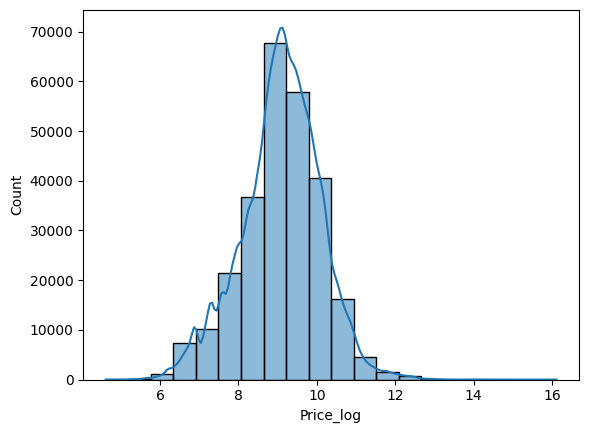

In [30]:
sns.histplot(data=data['Price_log'], bins=20, kde=True)

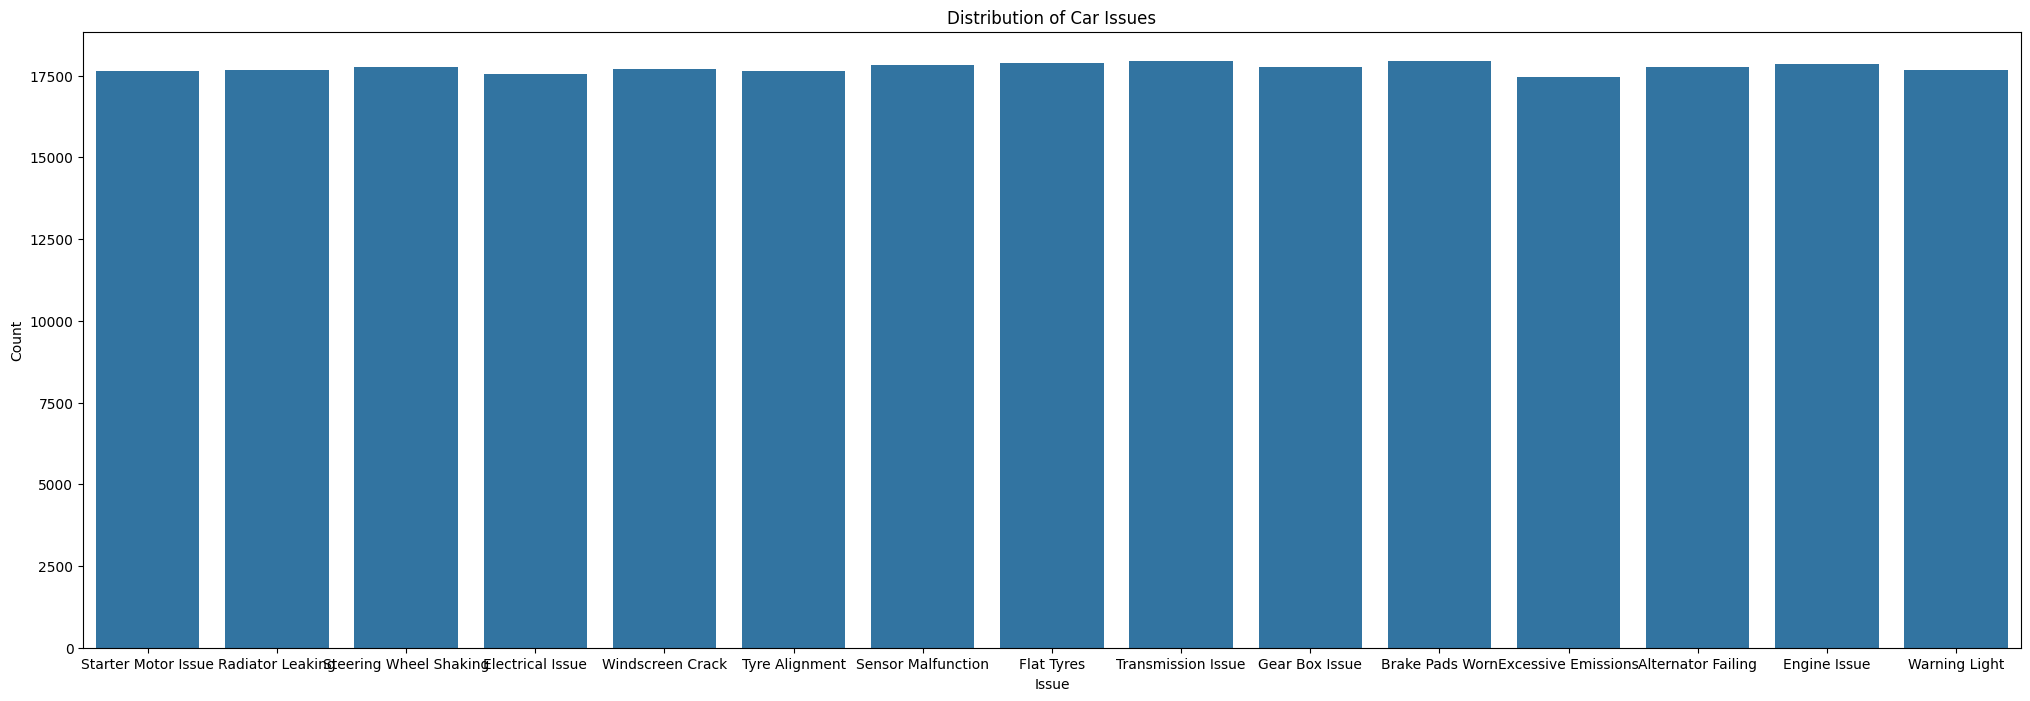

In [40]:
plt.figure(figsize=(25, 8))
sns.countplot(data=data, x='issue')
plt.title('Distribution of Car Issues')
plt.xlabel('Issue')
plt.ylabel('Count')
plt.show()

<h2>Feature Engineering</h2>
<P>trying to capture non linear relationships in the dataset</p>

In [31]:
# data['Runned_Miles_x_Seat_num'] = data['Runned_Miles'] * data['Seat_num']
data['Engin_size_x_Gearbox'] = data['Engin_size'] + '_' + data['Gearbox']
data['repair_hours_complexity'] = data["repair_hours"] * data['repair_complexity']

polynomial features

In [32]:
data['repair_hours**2'] = data['repair_hours']**2
data['repair_complexity**2'] = data['repair_complexity']**2

In [33]:
data2 =data.copy()

In [34]:
data2.columns

Index(['Maker', ' Genmodel', ' Genmodel_ID', 'Adv_year', 'Adv_month', 'Color',
       'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size', 'Gearbox',
       'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue', 'issue_id',
       'Adv_day', 'breakdown_date', 'repair_complexity', 'repair_cost',
       'repair_hours', 'Label', 'category_anomaly', 'repair_date',
       'last_repair_age', 'breakdown_date_dayofweek', 'breakdown_date_month',
       'repair_date_dayofweek', 'repair_date_month', 'Reg_year_log',
       'Runned_Miles_log', 'repair_cost_log', 'repair_hours_log', 'Price_log',
       'Engin_size_x_Gearbox', 'repair_hours_complexity', 'repair_hours**2',
       'repair_complexity**2'],
      dtype='object')

In [35]:
# Encode categorical variables
columns_to_encode = ['Maker','issue',' Genmodel', 'Bodytype', 'Gearbox', 'Fuel_type', 'issue',"Engin_size","Color",'Engin_size_x_Gearbox']
encoder = LabelEncoder()
for i in columns_to_encode:
    data2[i] = encoder.fit_transform(data2[i])


In [36]:
# Select features and target variable
X = data2.drop(["issue"," Genmodel_ID","issue_id",'breakdown_date','repair_date','Label'], axis=1)
y = data2['issue']

In [37]:
X.shape

(266065, 33)

In [38]:
X.head()

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,...,repair_date_month,Reg_year_log,Runned_Miles_log,repair_cost_log,repair_hours_log,Price_log,Engin_size_x_Gearbox,repair_hours_complexity,repair_hours**2,repair_complexity**2
0,5,146,2018,4,19,2000.0,14,60000,69,0,...,4,7.601402,11.002117,5.981414,2.302585,9.975855,170,27.0,81.0,9
1,5,146,2018,6,9,2002.0,14,44000,69,0,...,6,7.602401,10.691968,6.545350,1.945910,10.266428,170,18.0,36.0,9
2,5,146,2017,11,2,2002.0,14,55000,69,0,...,11,7.602401,10.915107,4.510849,1.386294,10.308953,170,9.0,9.0,9
3,5,146,2018,4,8,2003.0,14,14000,69,0,...,4,7.602900,9.546884,5.419844,1.945910,10.461645,170,18.0,36.0,9
4,5,146,2017,11,9,2003.0,14,61652,69,0,...,11,7.602900,11.029277,4.342935,1.386294,10.187011,170,9.0,9.0,9


In [41]:
!pip install optuna

In [ ]:
import optuna

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    xgb_param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'objective': 'multi:softprob',
        'tree_method': 'gpu_hist',
        'eval_metric': 'mlogloss',
        'random_state': 42,   'use_label_encoder': False , # Disable GPU training,
         'tree_method': 'hist',        # Use CPU-based tree method
         'gpu_id': -1
    }

    oof_pred = []
    fold = KFold(n_splits=5, random_state=42, shuffle=True)

    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        xgb_model = xgb.XGBClassifier(**xgb_param)
        xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False, early_stopping_rounds=150)

        preds = xgb_model.predict_proba(X_test)
        f1 = f1_score(y_test, preds.argmax(1), average='macro')
        oof_pred.append(f1)

    return np.mean(oof_pred)

# Create a study object and specify the direction is 'maximize'.
study = optuna.create_study(direction='maximize')

# Optimize the study, the objective function is passed in as the first argument.
study.optimize(objective, n_trials=50)  # You can specify the number of trials

# Print the result
print(f"Best trial: {study.best_trial.value}")
print(f"Best params: {study.best_trial.params}")


[I 2024-05-12 22:24:04,753] A new study created in memory with name: no-name-c9e1212c-db34-4a37-8023-b7d144078faa


Retrieving the best parameters from the above study.

In [ ]:
best_params={'learning_rate': 0.08842514346635928, 'max_depth': 9, 'subsample': 0.9978930557289465, 'colsample_bytree': 0.787564143427527, 'n_estimators': 999}

Using the above parameters to train a model with the above parameters

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Define the XGBoost parameters
xgb_param = {
    'learning_rate': 0.08842514346635928,
    'max_depth': 9,
    'subsample': 0.9978930557289465,
    'colsample_bytree': 0.787564143427527,
    'n_estimators': 999,
    'random_state': 42,
    'objective': 'multi:softprob',  # Use softmax for multi-class classification
    'tree_method': 'gpu_hist',
    'eval_metric': 'mlogloss'  # Use multi-class log loss for evaluation
}

fold_pred = []
oof_pred = []

# Cross-validation using KFold with 10 splits
fold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for i, (train_index, test_index) in enumerate(fold.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_model = xgb.XGBClassifier(**xgb_param, early_stopping_rounds=250)
    xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    preds = xgb_model.predict_proba(X_test)
    f1 = f1_score(y_test, preds.argmax(1), average='macro')
    print(f"F1 Score (Fold {i}): {f1:.4f}")
    oof_pred.append(f1)

print(f"Mean F1 Score: {np.mean(oof_pred):.4f}")

F1 Score (Fold 1): 0.8899
F1 Score (Fold 2): 0.8897
F1 Score (Fold 3): 0.8890
F1 Score (Fold 4): 0.8887
F1 Score (Fold 5): 0.8907
Mean F1 Score: 0.8896


In [ ]:
def get_xgb_varimp(model, train_columns, max_vars=350):
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T
    cv_varimp_df.columns = ['feature_name', 'varimp (%)']
    cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)
    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]
    return cv_varimp_df
get_xgb_varimp(xgb_model,X.columns)

,feature_name,varimp (%)
27,repair_hours_log,23.990696
17,repair_hours,17.721109
31,repair_hours**2,13.564721
30,repair_hours_complexity,13.091728
15,repair_complexity,7.578415
26,repair_cost_log,5.407506
32,repair_complexity**2,4.928927
16,repair_cost,3.739285
28,Price_log,2.275887
19,last_repair_age,1.953596


In [ ]:
import catboost as cb
# Define the CatBoost parameters
cb_param = {
    'random_seed': 42,
    'loss_function': 'MultiClass',  # Use MultiClass for classification
}

fold_pred = []
oof_pred = []

# Cross-validation using KFold with 5 splits
fold = KFold(n_splits=10, random_state=42, shuffle=True)
for i, (train_index, test_index) in enumerate(fold.split(X, y), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    catt_model = cb.CatBoostClassifier(**cb_param, task_type="GPU",)
    catt_model.fit(X_train, y_train, eval_set=(X_test, y_test),use_best_model=True ,verbose=False)

    catt_preds = catt_model.predict_proba(X_test)
    f1 = f1_score(y_test, catt_preds.argmax(axis=1), average='macro')
    print(f"F1 Score (Fold {i}): {f1:.4f}")
    oof_pred.append(f1)
print(f"Mean F1 Score: {np.mean(oof_pred):.4f}")

F1 Score (Fold 1): 0.8671
F1 Score (Fold 2): 0.8692
F1 Score (Fold 3): 0.8669
F1 Score (Fold 4): 0.8703
F1 Score (Fold 5): 0.8644
F1 Score (Fold 6): 0.8663
F1 Score (Fold 7): 0.8666
F1 Score (Fold 8): 0.8661
F1 Score (Fold 9): 0.8667
F1 Score (Fold 10): 0.8652
Mean F1 Score: 0.8669


In [ ]:
def get_catt_varimp(model, train_columns, max_vars=350):
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T
    cv_varimp_df.columns = ['feature_name', 'varimp (%)']
    cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)
    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]
    return cv_varimp_df
get_catt_varimp(catt_model,X.columns)

,feature_name,varimp (%)
16,repair_cost,31.364268
11,Price,19.215794
30,repair_hours_complexity,12.682875
17,repair_hours,10.672434
15,repair_complexity,4.774365
26,repair_cost_log,4.222439
19,last_repair_age,3.454852
27,repair_hours_log,2.893465
28,Price_log,1.535248
31,repair_hours**2,1.322628


In [ ]:
from sklearn.metrics import accuracy_score
acc_score=accuracy_score(y_test,preds.argmax(1))

In [ ]:
acc_score

0.8905342679420443

<h2>Further metrics for evaluating the model</h2>